In [5]:
import pandas as pd
df = pd.read_csv('celphone_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Aqui se realiza el tratamiento de nulos, donde verifico la cantidad de valores nulos o faltantes, que al realizar un analisis no se detecto ningun tipo de valor faltante.

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

En el tratamiento de texto a numerico, o codificacion, no contamos con valores de tipo texto, ya que la mayoria son o de tipo int64 y float64, tambien teniendo en cuenta que existen valores que son como categoricos, como los atributos (blue, dual sim, four_g, three_g, touch_screen, wifi)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

En el area de normalizacion, si noto que una variedad de atributos contienen valores muy grandes, como por ejemplo (battery_power, mobile_wt, px_height, px_width, ram, entre otros que llegan a variar, por lo que, para el entrenamiento de mi modelo, escalare todos los datos del data set)

In [8]:
#Comenzamos con el escalado de todos los atributos, exeptuando el atriburo "price_range", por lo que eliminare dicho
#Atributo del dataframe por ser el atributo clase 
df2 = pd.DataFrame(df)
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scalerMinMax = MinMaxScaler()
df2.iloc[:,0:20] = scalerMinMax.fit_transform(df2.iloc[:,0:20])
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


En esta seccion, se deberan escoger las caracteristicas para el entrenamiento del modelo, pero antes de realizar dicha seleccion, se hara uso de 3 metodos pa seleccion de las mejores caracteristicas.
Para la demostracion, empezaremos con el metodo de envoltura, utlizando la eliminacion recursiva de caracteristicas utilizando Cross-validated

In [10]:
#Primero crearemos dos variables las cuales utlizaremos en los tres modelos, X y Y
x = df2.iloc[:,0:20]
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0


In [11]:
y = df.iloc[:,20]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [12]:
#Importamos un modelo de regresion logistica, esto para agregar el modelo que utlizaremos dentro del metodo
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

#Ahora importaremos dicho metodo y lo aplicaremos, donde la propia funcion ya realiza la separacion de los datos
from sklearn.feature_selection import RFECV
n_rfecv = RFECV(estimator=modelo, step=1, cv=5, scoring='accuracy')
result_fecv = n_rfecv.fit(x,y)

print('Caracteristicas seleccionadas ', result_fecv.support_)

print('Ranking de las caracteristicas ', result_fecv.ranking_)

print('Numero optimo de caracteristicas: ', result_fecv.n_features_)

Caracteristicas seleccionadas  [ True False False False False False False False  True False False  True
  True  True False False False False False False]
Ranking de las caracteristicas  [ 1 16  7 15  6 10  2  5  1  4 13  1  1  1  3  8  9 11 12 14]
Numero optimo de caracteristicas:  5


Como se puede visualizar nos marca diferentes atributos, por lo que para comprobar la presicion de nuestro modelo, creare un modelo de maquina de vectores de soporte, donde creare tres variables que almacene los atributos que me recomiende los distintos metodos, para realizar una precision del acuracy de los tres diferentes metodos de seleccion

In [13]:
#Se crea la variable x con los valores recomendados
x_rfecv = x.iloc[:,[0,8,11,12,13]]
x_rfecv.head()

,battery_power,mobile_wt,px_height,px_width,ram
0,0.227789,0.900000,0.010204,0.170895,0.612774
1,0.347361,0.466667,0.461735,0.993324,0.634687
2,0.041416,0.541667,0.644388,0.811749,0.627205
3,0.076152,0.425000,0.620408,0.858478,0.671566
4,0.881764,0.508333,0.616327,0.475300,0.308658


In [14]:
#Creamos el modelo y agregamos un metodo para sacar el accuracy, que yo utlizare cross-score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#Se empieza a entrenar el modelo
smv = SVC()

#Se saca el accuracy con cross validation
scores = cross_val_score(smv, x_rfecv, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.9425 0.9375 0.9375 0.945  0.95  ]


0.9424999999999999

Ahora pasaremos a utlizar el metodo de filtro, utlizando el metodo de correlacion de pearson

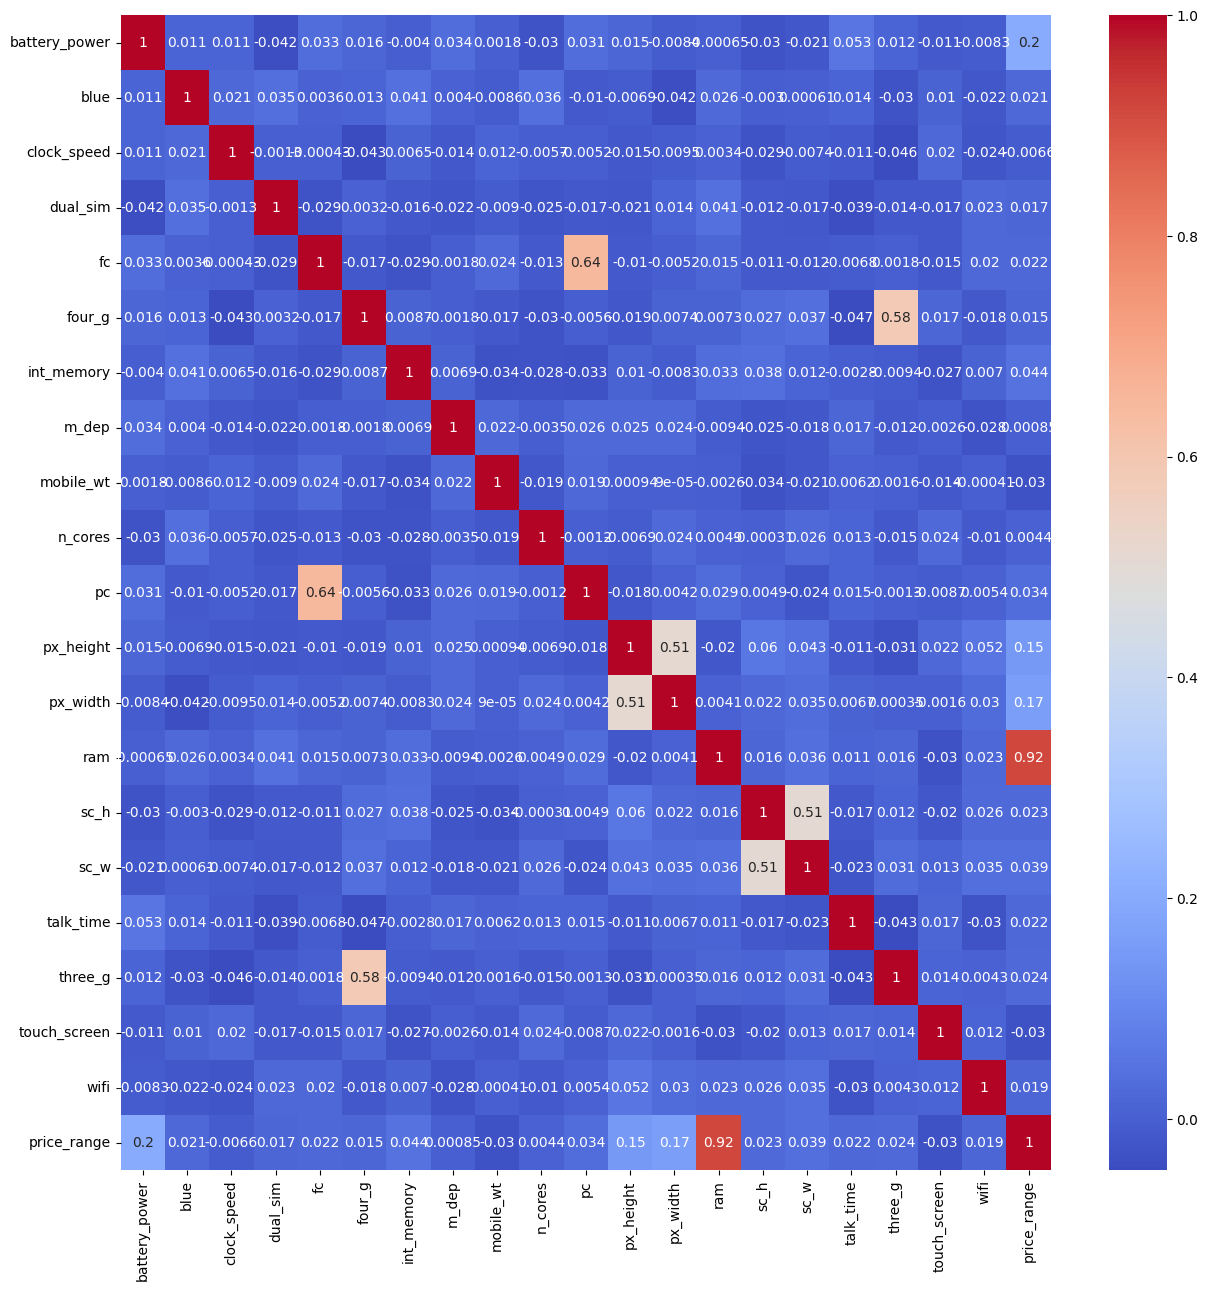

In [15]:
#Importamos las librerias necesarias, el primero es para realizar la correacion de pearson, y la segunda es para
#Representarla de manera grafica
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Como se puede visualizar, se creo una grafica mostrando que nivel de correlacion que tiene cada atributo entre las demas existentes, pero por ser 19 atributos, puede costar la visualizacion de los datos requeridos, por lo que realizare dicho metodo, pero con solo la variable objetivo, sin la necesidad de mostrar dicha grafica

In [16]:
# Calcular la correlación de cada característica con la variable objetivo
correlations = abs(df2.corr()['price_range'].drop('price_range'))

# Ordenar las características por su correlación con la variable objetivo
sorted_features = correlations.sort_values(ascending=False)

print(sorted_features)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


Aqui se puede visualizar, las diferentes correlaciones de todos los atributos con la clase, donde destacan para mi, solo 4 atributos (ram,battery_power,px_width,px_height), los cuales utilizare y almacenare en una variable para el entrenamiento de una maquina de vectores, para comprobar el accuracy del modelo.

In [17]:
#Creacion de la variable x_pearson para el entrenamiento del modelo
x_pearson = x.iloc[:,[0,11,12,13]]
x_pearson

,battery_power,px_height,px_width,ram
0,0.227789,0.010204,0.170895,0.612774
1,0.347361,0.461735,0.993324,0.634687
2,0.041416,0.644388,0.811749,0.627205
3,0.076152,0.620408,0.858478,0.671566
4,0.881764,0.616327,0.475300,0.308658
...,...,...,...,...
1995,0.195725,0.623469,0.927904,0.110102
1996,0.977956,0.466837,0.977971,0.474613
1997,0.941884,0.442857,0.755674,0.748530
1998,0.675351,0.171429,0.113485,0.163816


Ahora realizo el entrenamiento de dicho modelo junto a su accuracy con cross scoring

In [18]:
scores_pearson = cross_val_score(smv, x_pearson, y, cv=5, scoring='accuracy')
print(scores_pearson)
scores_pearson.mean()

[0.95   0.935  0.95   0.9425 0.9425]


0.944

Ahora por ultimo, utlizare el metodo de seleccion de caracteristicas con random Forest

In [19]:
#Primero importamos la libreria y la funcion necesaria
from sklearn.ensemble import RandomForestClassifier

#Para dicho metodo, es necesario tener en cuenta que los valores de clasificacion deben ser numericos (0,1,2,3,etc)
#Como este data frame ya contiene este tipo de clasificacion, no es necesario realizar dicha conversion
#Sabiendo eso, creamos una variable con la funcionalidad del metodo
clf = RandomForestClassifier()

#Entrenamos el clasificador de bosque aleatorio
clf.fit(x,y)

# Obtiene la importancia de las características
importances = clf.feature_importances_

# Crea un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Ordena las características por importancia
sorted_features = feature_importances.sort_values(by='importance', ascending=False)

print(sorted_features)

          feature  importance
13            ram    0.474222
0   battery_power    0.074349
12       px_width    0.057262
11      px_height    0.054604
8       mobile_wt    0.039912
6      int_memory    0.037365
16      talk_time    0.030528
15           sc_w    0.029510
10             pc    0.029491
14           sc_h    0.029052
2     clock_speed    0.027755
4              fc    0.025962
7           m_dep    0.025438
9         n_cores    0.024591
5          four_g    0.007301
3        dual_sim    0.007071
18   touch_screen    0.006902
1            blue    0.006652
19           wifi    0.006458
17        three_g    0.005574


In [22]:
modeloForestRadom = RandomForestClassifier(random_state=0)

scores = cross_val_score(modeloForestRadom,x,y,scoring="accuracy", cv=5, n_jobs=1)

print(scores)
print(scores.mean())

[0.87   0.865  0.9025 0.8725 0.88  ]
0.8779999999999999


Como se puede visualizar, este metodo me recuerda o se me hace muy parecido al metodo anterior, el de filtro, donde utlizamos el metodo de correlacion de pearson, solo que en ves de tomar las correlaciones de cada atributo a solo nuestro atributo clase, y lo que hace es captar las interacciones complejas entre cada caracteristica

In [23]:
#Ahora se realizara un ejemplo, pero utilizando arboles de decision, por lo que primero imcluimos la liberia
from sklearn.tree import DecisionTreeClassifier

# Entrena un clasificador de árbol de decisión
clfDT = DecisionTreeClassifier()
clfDT.fit(x, y)

# Obtiene la importancia de las características
importances = clf.feature_importances_

# Crea un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Ordena las características por importancia
sorted_features = feature_importances.sort_values(by='importance', ascending=False)

print(sorted_features)

          feature  importance
13            ram    0.474222
0   battery_power    0.074349
12       px_width    0.057262
11      px_height    0.054604
8       mobile_wt    0.039912
6      int_memory    0.037365
16      talk_time    0.030528
15           sc_w    0.029510
10             pc    0.029491
14           sc_h    0.029052
2     clock_speed    0.027755
4              fc    0.025962
7           m_dep    0.025438
9         n_cores    0.024591
5          four_g    0.007301
3        dual_sim    0.007071
18   touch_screen    0.006902
1            blue    0.006652
19           wifi    0.006458
17        three_g    0.005574


Como se puede visualizar, contamos con los atributos ordenados de manera que los que estan mas arriba, son aquellos atributos con cierto umbral de importancia o con las mejores caracteristicas, que en mi caso son (ram, battery_power, px_height, px_width).
La razon del porque es porque el atributo numero 5 en la lista mostrada, baja enormemente de importancia con los primeros 4, por lo que para mi queda fuera para el entrenamiento del modelo.
Por ultimo, un dato muy interesante, es que estos atributos son iguales a los mostrados del metodo anterior

In [24]:
#Almacenare los valores que seleccione en una variable
x_randomForest = x.iloc[:,[0,11,12,13]]
x_randomForest

,battery_power,px_height,px_width,ram
0,0.227789,0.010204,0.170895,0.612774
1,0.347361,0.461735,0.993324,0.634687
2,0.041416,0.644388,0.811749,0.627205
3,0.076152,0.620408,0.858478,0.671566
4,0.881764,0.616327,0.475300,0.308658
...,...,...,...,...
1995,0.195725,0.623469,0.927904,0.110102
1996,0.977956,0.466837,0.977971,0.474613
1997,0.941884,0.442857,0.755674,0.748530
1998,0.675351,0.171429,0.113485,0.163816


In [25]:
#Entrenamos el modelo y sacamos el accuracy con los valores almacenados en la variable
scores_randomForest = cross_val_score(smv, x_randomForest, y, cv=5, scoring='accuracy')
print(scores_randomForest)
scores_randomForest.mean()

[0.95   0.935  0.95   0.9425 0.9425]


0.944

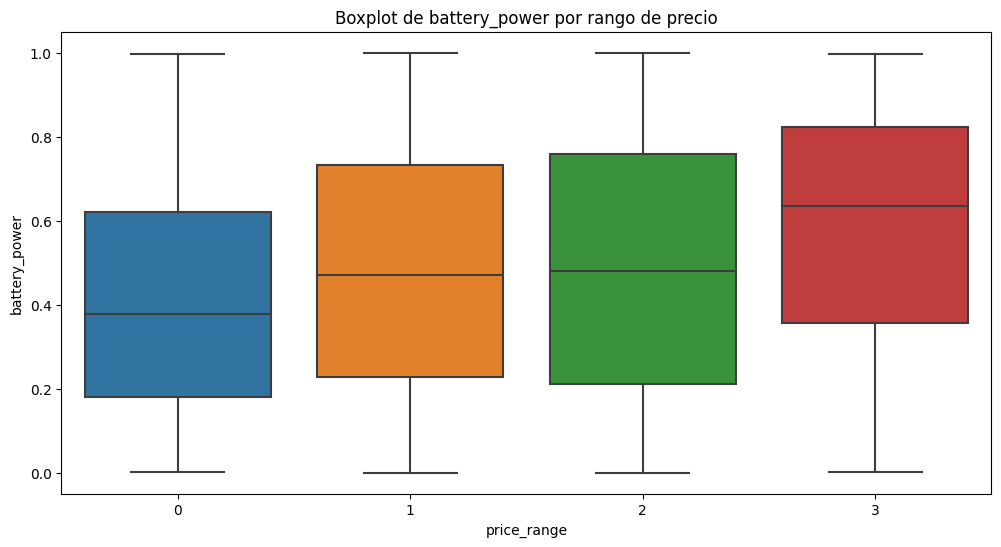

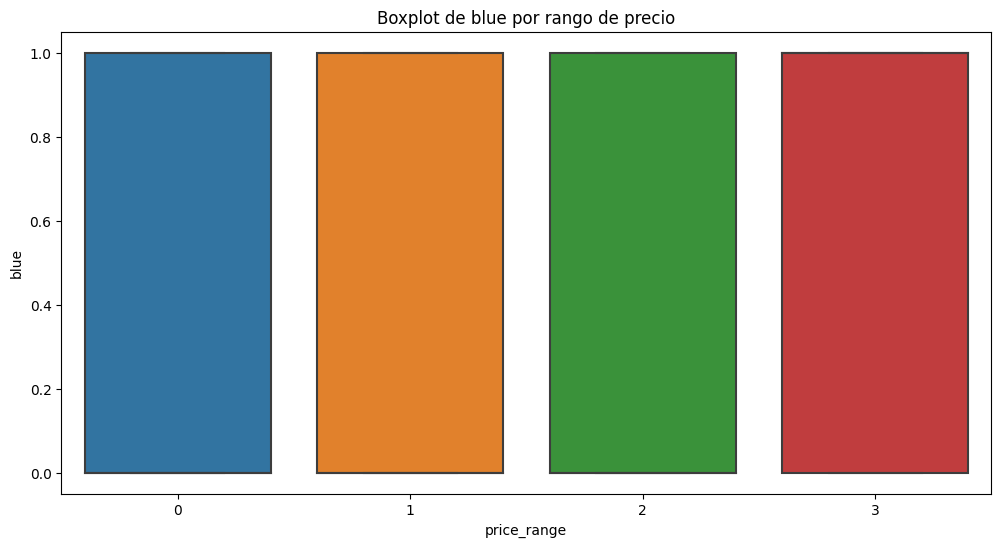

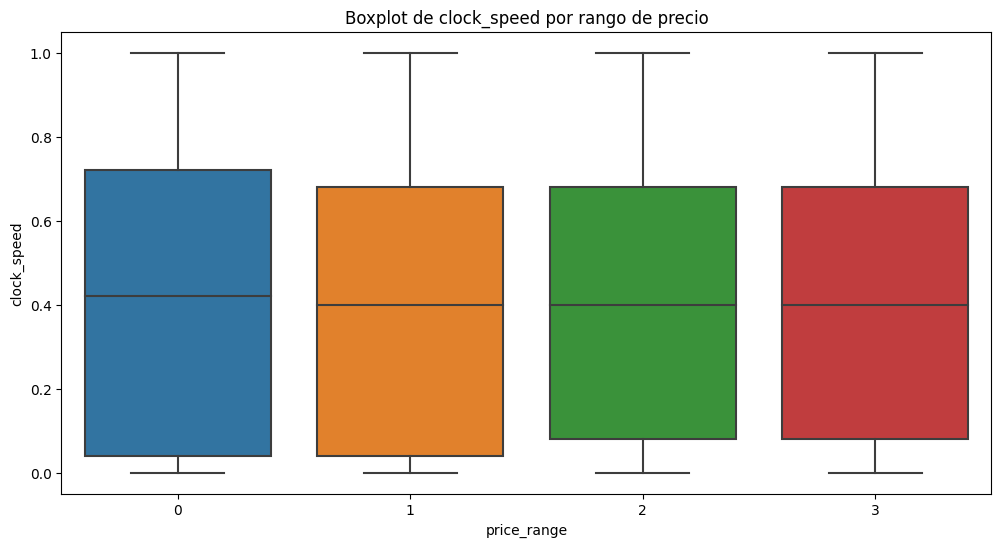

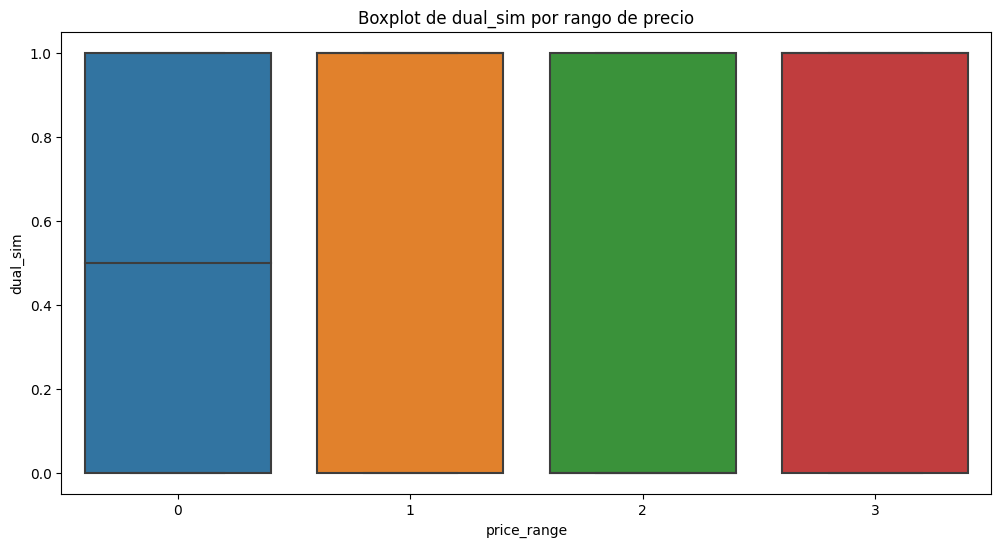

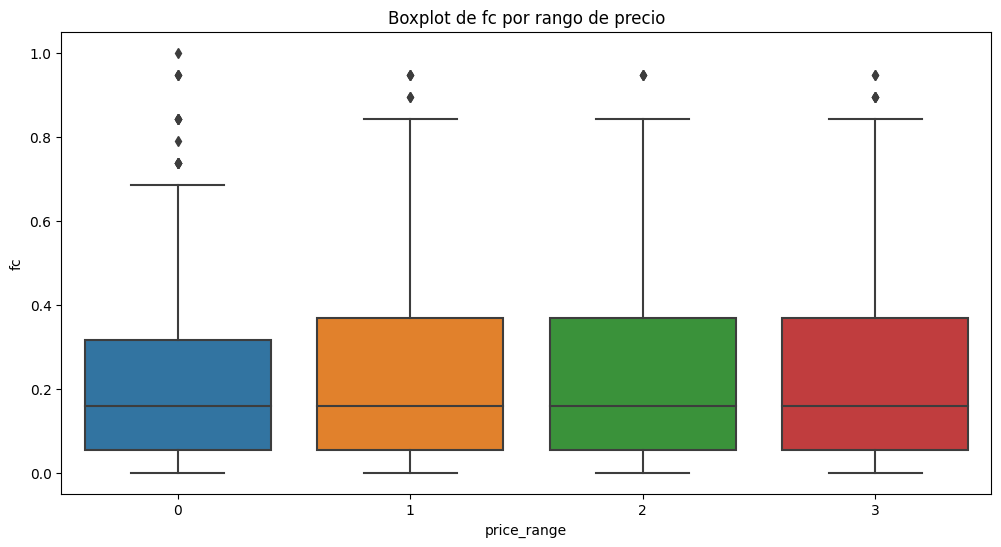

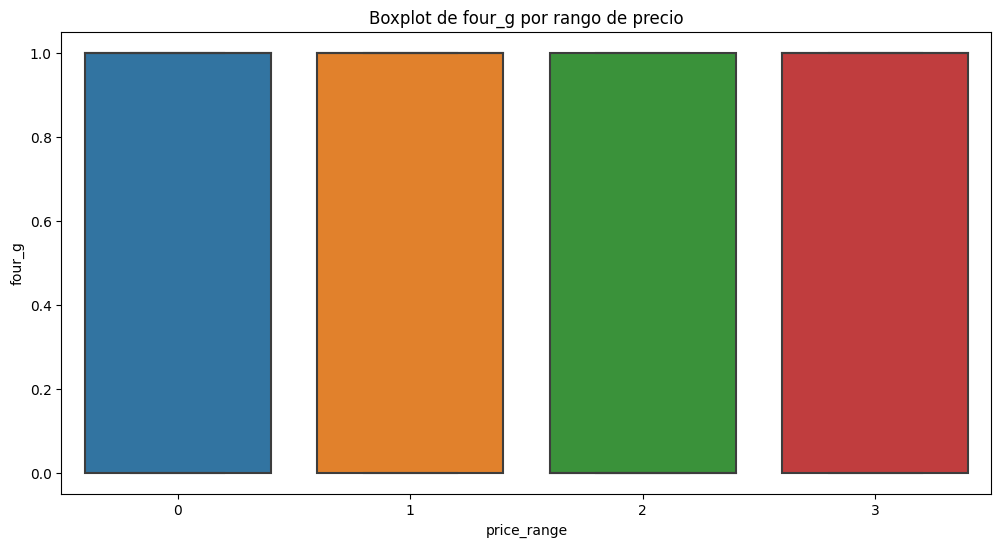

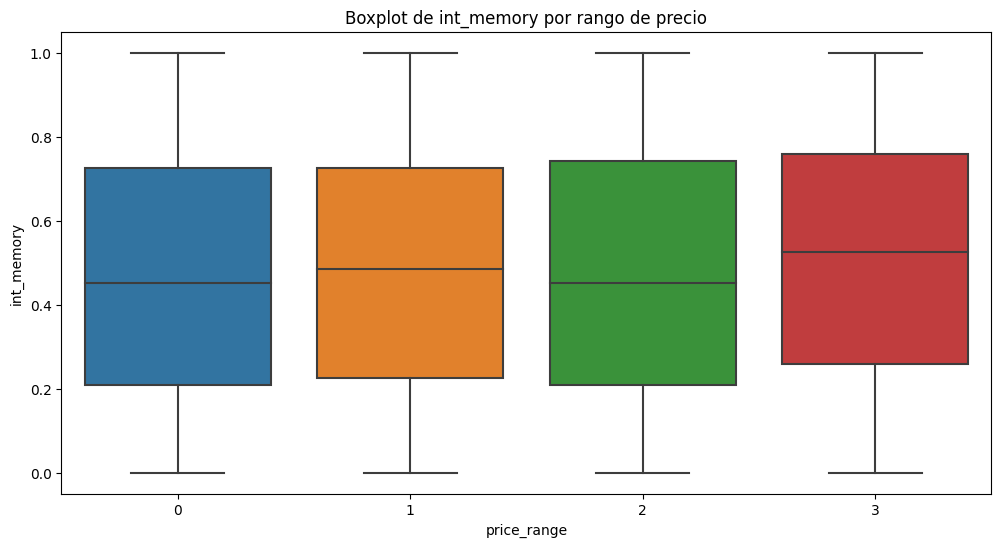

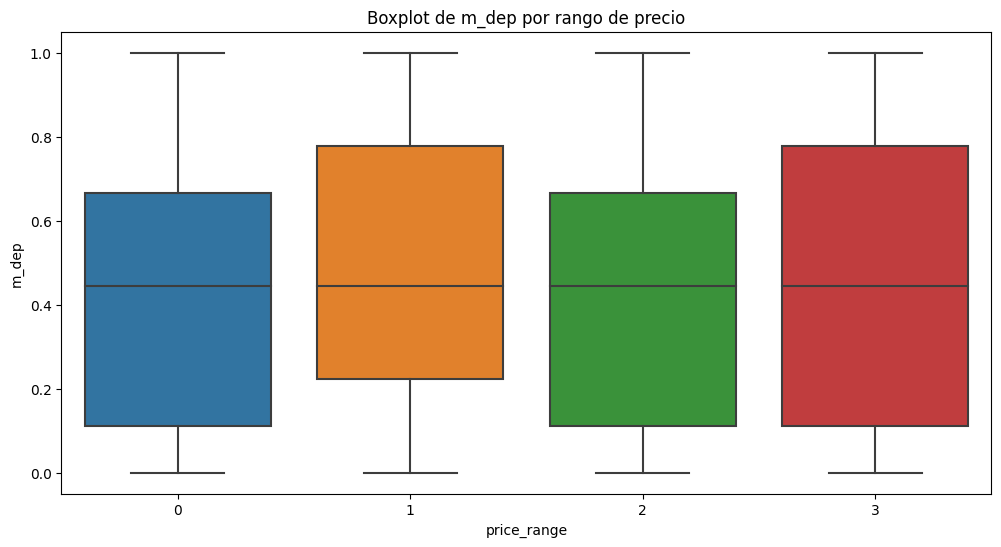

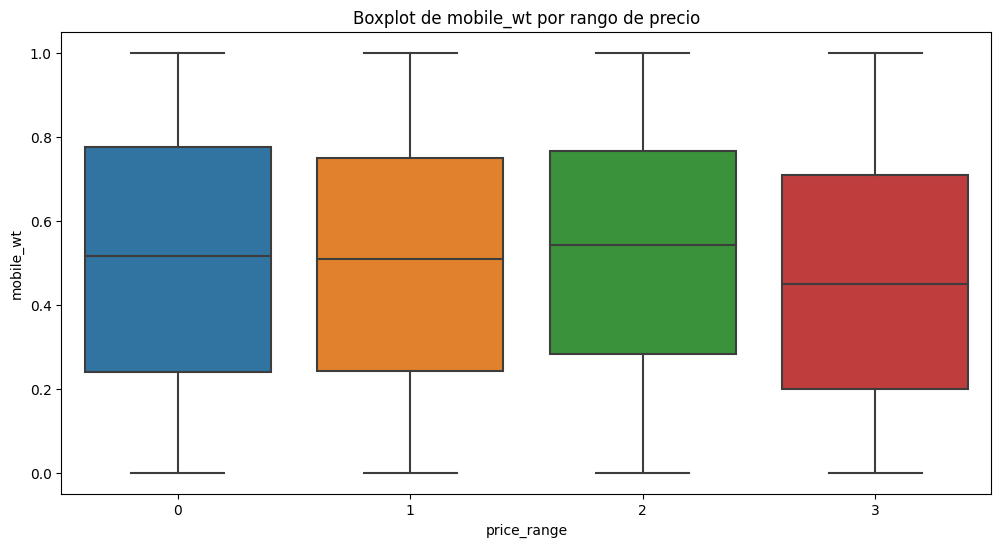

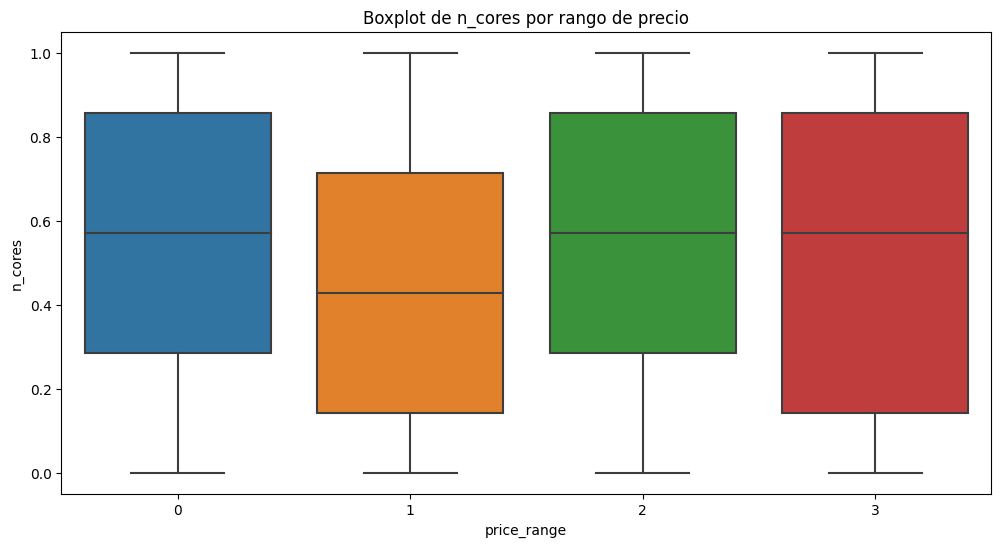

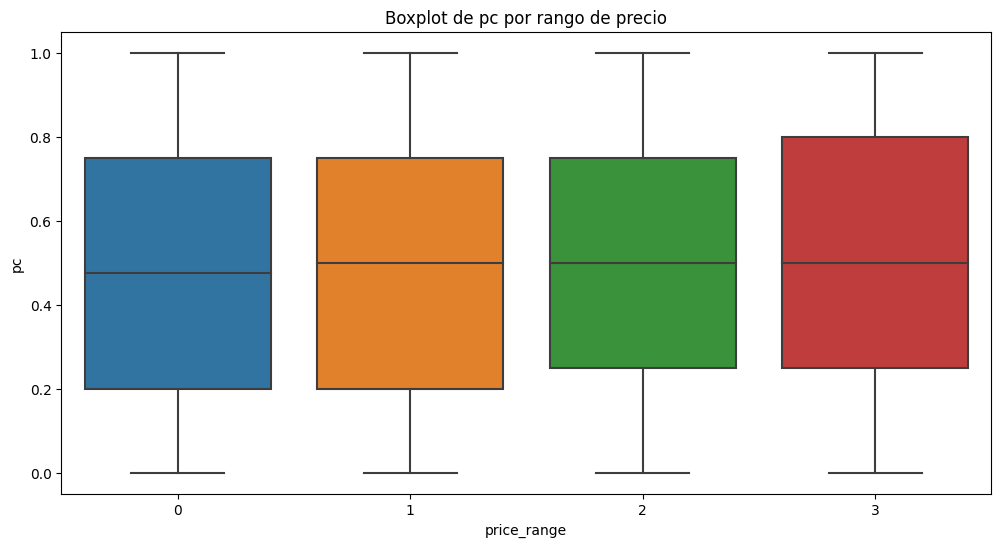

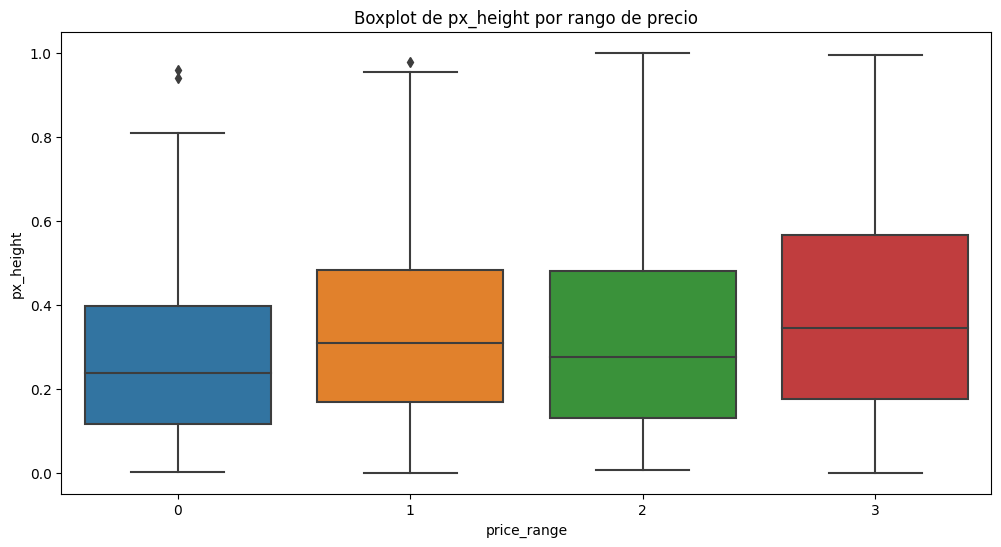

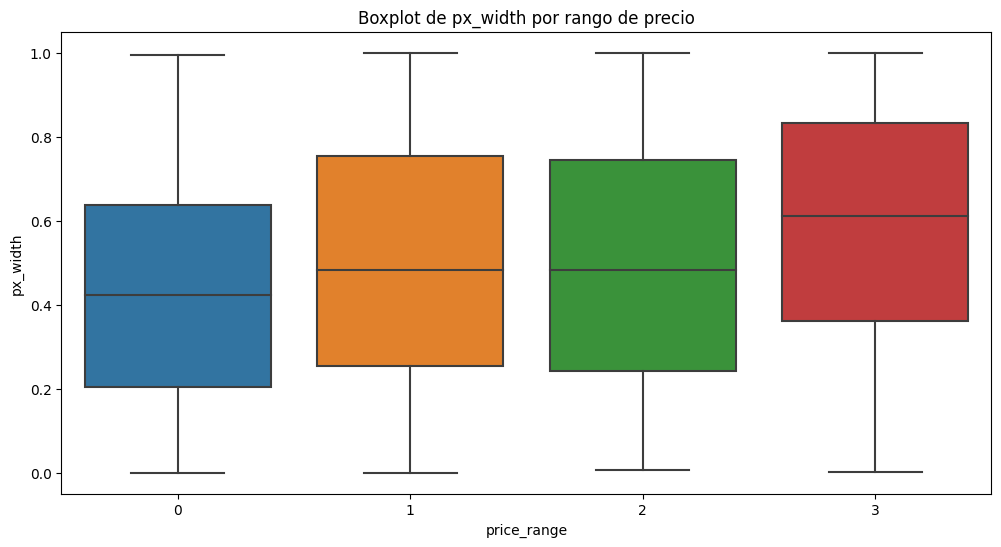

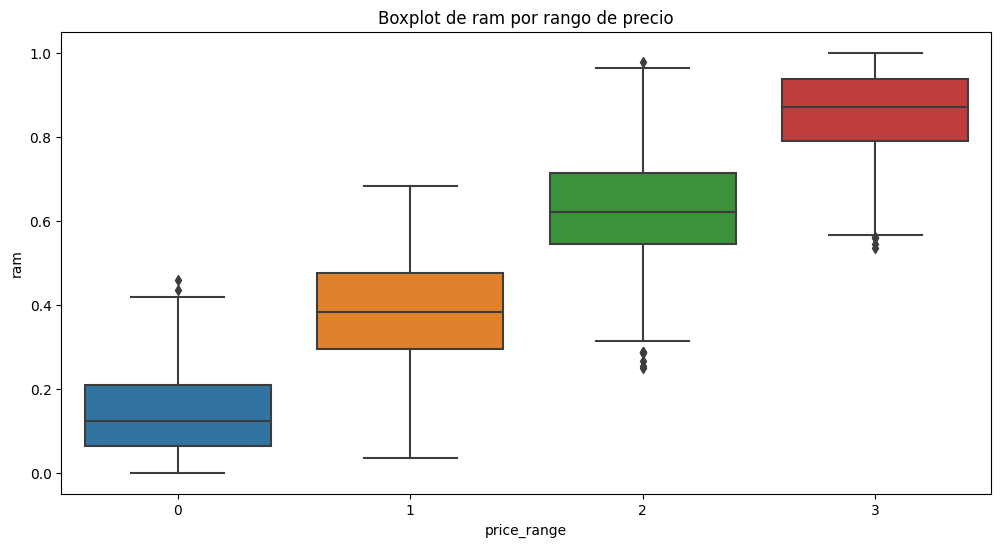

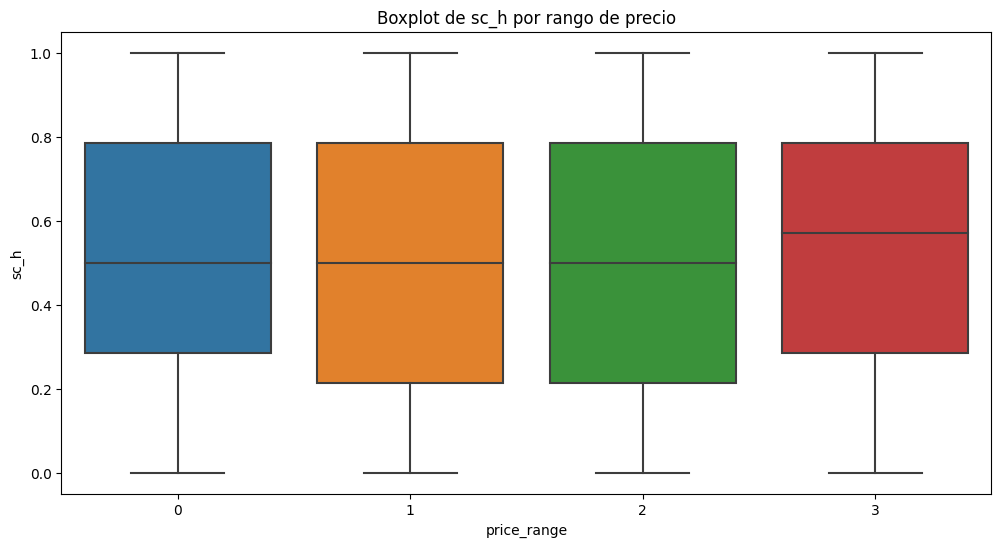

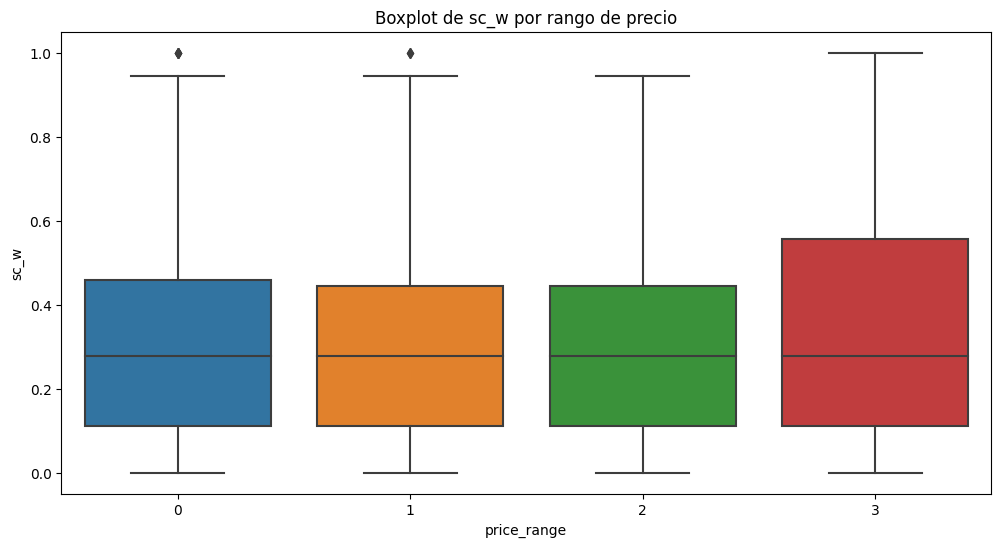

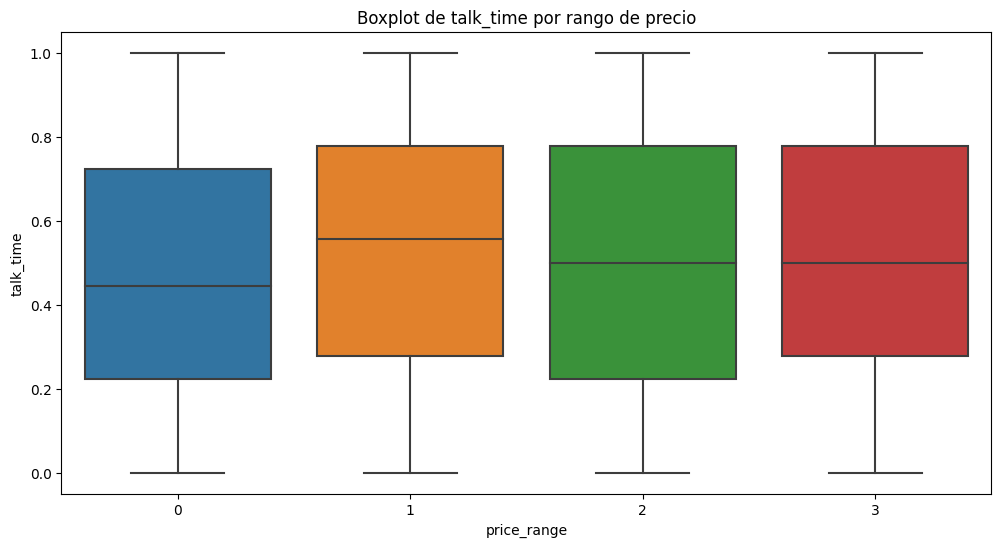

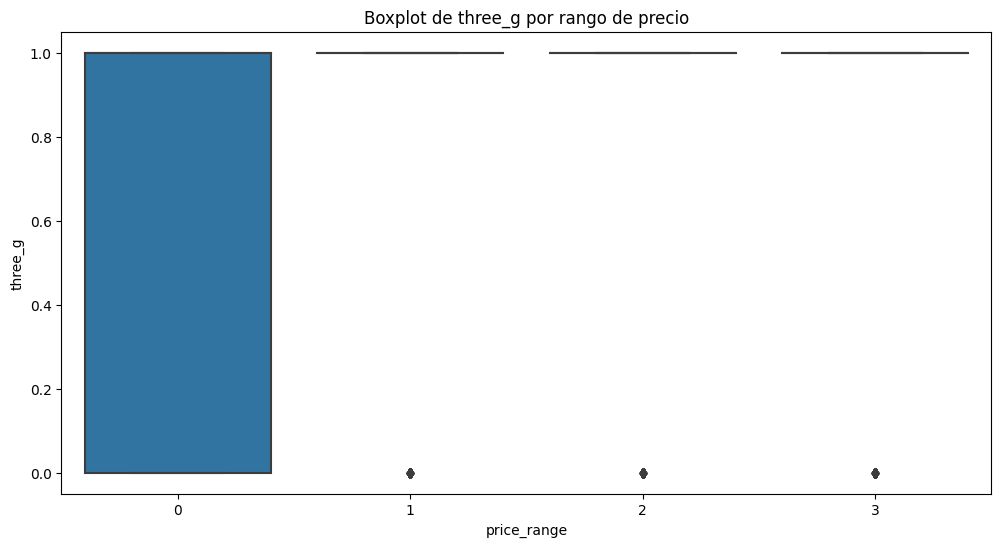

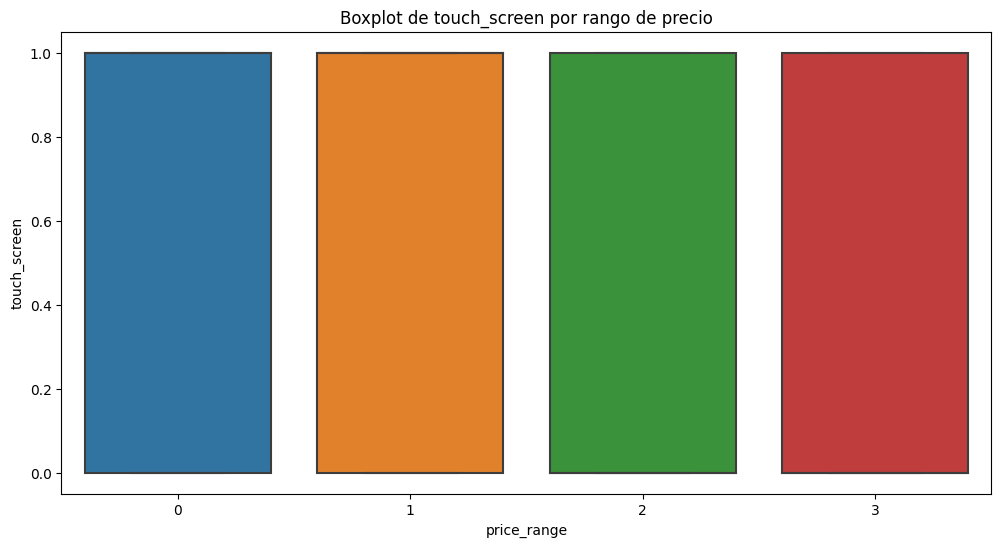

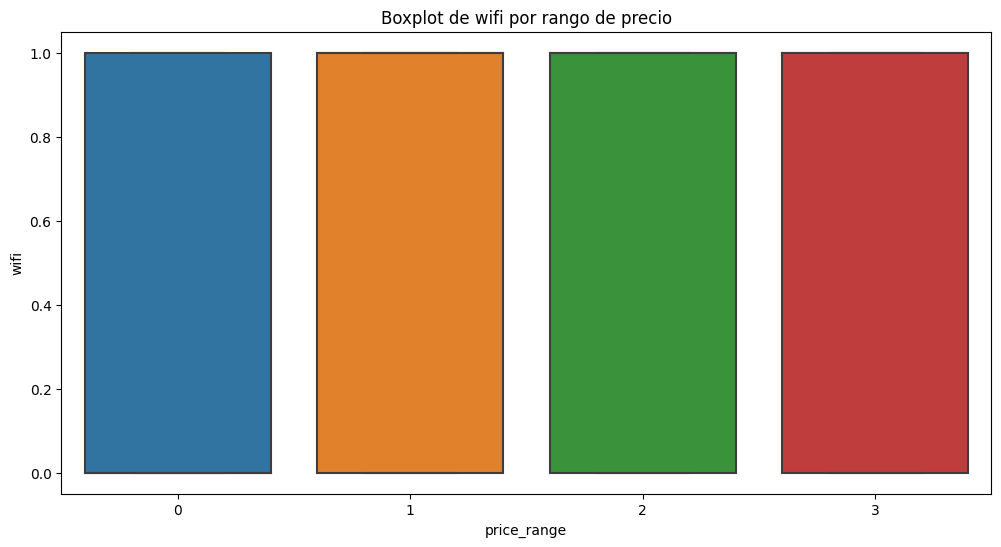

In [26]:
# Crear un boxplot para cada característica, dividido por especie
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df2, x='price_range', y=feature)
    plt.title('Boxplot de {} por rango de precio'.format(feature))
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
smv2 = SVC()
smv2.fit(x_train, y_train)

#Se realiza la prediccion
y_predic = smv2.predict(x_test)

#Se realiza la matriz de prediccion
confusion_matrix(y_test,y_predic)

array([[100,   5,   0,   0],
       [  6,  77,   8,   0],
       [  0,  14,  71,   7],
       [  0,   0,  15,  97]], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test,y_predic)
recall = recall_score(y_test,y_predic, average='weighted')
precision = precision_score(y_test,y_predic, average='weighted')
print('El accuracy es de: ', accuracy)
print('El recall es de: ', recall)
print('El precision es de: ', precision)

El accuracy es de:  0.8625
El recall es de:  0.8625
El precision es de:  0.864992718176461


Aqui utilizo la metrica de calificacion F1 y el area bajo la curva

In [30]:
#Primero importamos la liberia para utilizar la metrica F1
from sklearn.metrics import f1_score

#Ahora seleccionaremos los dos valores a calificar, que son los anteriores utilizados
f1Score= f1_score(y_test,y_predic, average=None)

#Lo imprimimos
print('El score F1 es de: ', f1Score)

El score F1 es de:  [0.9478673  0.82352941 0.76344086 0.89814815]


In [31]:
#Para sacar el area bajo la curva, primero importamos la libreria para sacar el promedio
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

clfMLPC = MLPClassifier()

clfMLPC.fit(x_train, y_train)

#
probabiliades = clfMLPC.predict_proba(x_test)
probabiliades = probabiliades[:,1]


#Luego seleccionaremos nuestras variables con un modelo de entranmiento, donde tambien ingresaremos nuestro y_test
auc_score = roc_auc_score(y_test, probabiliades)
print(auc_score)

C:\Users\Michi\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: multi_class must be in ('ovo', 'ovr')